In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Create a custom legend (optional)
import matplotlib.patches as mpatches

In [2]:
def implied_correlation(sigma_i, sigma_1, beta, w1):
    """Calculates the implied correlation."""
    sigma_2 = beta * sigma_1
    numerator = sigma_i**2 - w1 * sigma_1**2 - (1 - w1) * sigma_2**2
    denominator = 2 * w1 * (1 - w1) * beta * sigma_1**2
    return numerator / denominator

0.15000000000000002


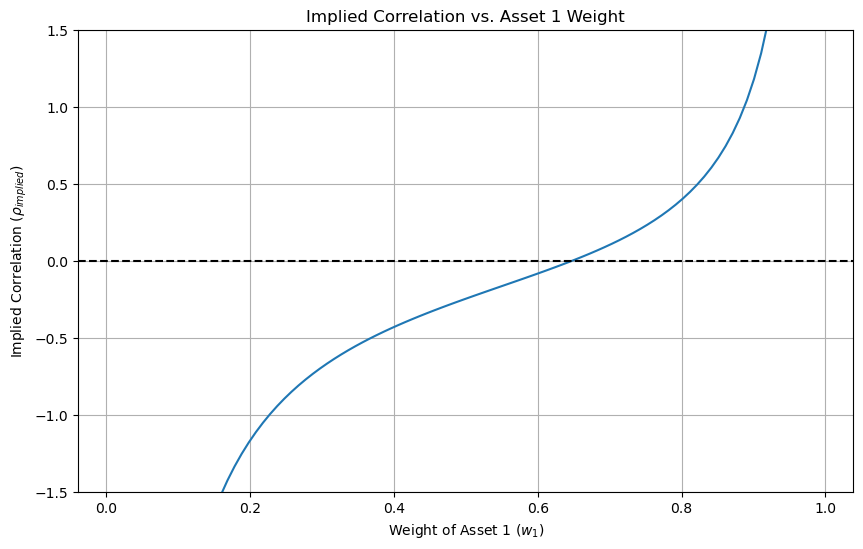

In [3]:
# Define parameters
sigma_i = 0.12
sigma_1 = 0.10
beta = 1.5
print(beta*sigma_1)

# Generate weights
w1_values = np.linspace(0.01, 0.99, 100) #avoiding 0 and 1, to prevent division by zero.

# Calculate implied correlations
rho_values = [implied_correlation(sigma_i, sigma_1, beta, w) for w in w1_values]

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(w1_values, rho_values)
plt.xlabel("Weight of Asset 1 ($w_1$)")
plt.ylabel("Implied Correlation ($ρ_{implied}$)")
plt.ylim((-1.5,1.5))
plt.title("Implied Correlation vs. Asset 1 Weight")
plt.grid(True)

plt.axhline(y=0, color='black', linestyle='--') 

plt.show()

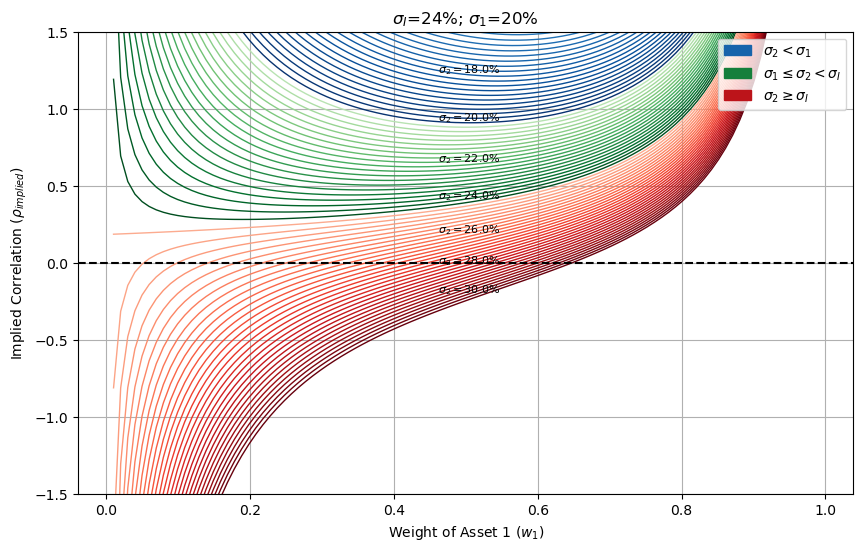

In [4]:
sigma_i = 0.24  # Portfolio volatility
sigma_1 = 0.20  # Volatility of asset 1

# Generate weights
w1_values = np.linspace(0.01, 0.99, 100)

# Beta values to plot
beta_values = np.linspace(0.5, 1.5, 101)  # Adjusted range for better visualization

# Plot the curves
plt.figure(figsize=(10, 6))

# Create colormaps
cmap_lower = plt.get_cmap('Blues')  # For sigma_1 * beta < sigma_1
cmap_middle = plt.get_cmap('Greens') # For sigma_1 < sigma_1 * beta < sigma_i
cmap_upper = plt.get_cmap('Reds')  # For sigma_1 * beta > sigma_i

for i, beta in enumerate(beta_values):
    rho_values = [implied_correlation(sigma_i, sigma_1, beta, w) for w in w1_values]

    sigma_2 = sigma_1 * beta

    if sigma_2 < sigma_1:
        normalized_beta = (beta - min(beta_values)) / (1 - min(beta_values))
        color = cmap_lower(0.3 + 0.7 * normalized_beta)  # Start at 30% opacity
    elif sigma_1 <= sigma_2 < sigma_i:
        normalized_beta = (sigma_2 - sigma_1) / (sigma_i - sigma_1)
        color = cmap_middle(0.3 + 0.7 * normalized_beta)  # Start at 30% opacity
    else:
        normalized_beta = (sigma_2 - sigma_i) / (sigma_1 * max(beta_values) - sigma_i)
        color = cmap_upper(0.3 + 0.7 * normalized_beta)  # Start at 30% opacity

    plt.plot(w1_values, rho_values, color=color, linewidth=1)

    # Add beta labels every 10 betas
    if i % 10 == 0:
        # Find the middle w1 value for label placement
        middle_w1_index = len(w1_values) // 2
        middle_rho = rho_values[middle_w1_index]
        plt.annotate(f"$\sigma_2 = ${beta*sigma_1*100:.1f}%", (w1_values[middle_w1_index], middle_rho),
                     textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.xlabel("Weight of Asset 1 ($w_1$)")
plt.ylabel(r"Implied Correlation ($\rho_{implied}$)")
plt.title(f"$\sigma_I$={sigma_i*100:.0f}%; $\sigma_1$={sigma_1*100:.0f}%")
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim((-1.5, 1.5))

# Create a custom legend (optional)
blue_patch = mpatches.Patch(color=cmap_lower(0.8), label=r'$\sigma_2 < \sigma_1$')
green_patch = mpatches.Patch(color=cmap_middle(0.8), label=r'$\sigma_1 \leq \sigma_2 < \sigma_I$')
red_patch = mpatches.Patch(color=cmap_upper(0.8), label=r'$\sigma_2 \geq \sigma_I$')
plt.legend(handles=[blue_patch, green_patch, red_patch], loc='upper right')

plt.show()

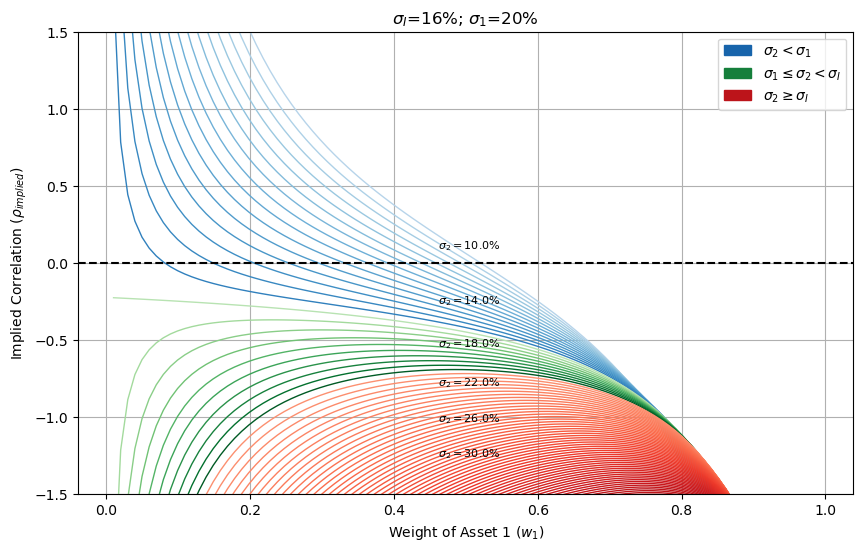

In [5]:
sigma_i = 0.16  # Portfolio volatility
sigma_1 = 0.20  # Volatility of asset 1

# Generate weights
w1_values = np.linspace(0.01, 0.99, 100)

# Beta values to plot
beta_values = np.linspace(0.5, 2.5, 101)  # Adjusted range for better visualization

# Plot the curves
plt.figure(figsize=(10, 6))

# Create colormaps
cmap_lower = plt.get_cmap('Blues')  # For sigma_1 * beta < sigma_1
cmap_middle = plt.get_cmap('Greens') # For sigma_1 < sigma_1 * beta < sigma_i
cmap_upper = plt.get_cmap('Reds')  # For sigma_1 * beta > sigma_i

for i, beta in enumerate(beta_values):
    rho_values = [implied_correlation(sigma_i, sigma_1, beta, w) for w in w1_values]

    sigma_2 = sigma_1 * beta

    if sigma_2 < sigma_i:
        normalized_beta = (beta - min(beta_values)) / (1 - min(beta_values))
        color = cmap_lower(0.3 + 0.7 * normalized_beta)  # Start at 30% opacity
    elif sigma_i <= sigma_2 < sigma_1:
        normalized_beta = (sigma_2 - sigma_i) / (sigma_1 - sigma_i)
        color = cmap_middle(0.3 + 0.7 * normalized_beta)  # Start at 30% opacity
    else:
        normalized_beta = (sigma_2 - sigma_i) / (sigma_1 * max(beta_values) - sigma_i)
        color = cmap_upper(0.3 + 0.7 * normalized_beta)  # Start at 30% opacity

    plt.plot(w1_values, rho_values, color=color, linewidth=1)

    # Add beta labels every 10 betas
    if i % 10 == 0:
        # Find the middle w1 value for label placement
        middle_w1_index = len(w1_values) // 2
        middle_rho = rho_values[middle_w1_index]
        plt.annotate(f"$\sigma_2 = ${beta*sigma_1*100:.1f}%", (w1_values[middle_w1_index], middle_rho),
                     textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.xlabel("Weight of Asset 1 ($w_1$)")
plt.ylabel(r"Implied Correlation ($\rho_{implied}$)")
plt.title(f"$\sigma_I$={sigma_i*100:.0f}%; $\sigma_1$={sigma_1*100:.0f}%")
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim((-1.5, 1.5))

# Create a custom legend
blue_patch = mpatches.Patch(color=cmap_lower(0.8), label=r'$\sigma_2 < \sigma_1$')
green_patch = mpatches.Patch(color=cmap_middle(0.8), label=r'$\sigma_1 \leq \sigma_2 < \sigma_I$')
red_patch = mpatches.Patch(color=cmap_upper(0.8), label=r'$\sigma_2 \geq \sigma_I$')
plt.legend(handles=[blue_patch, green_patch, red_patch], loc='upper right')

plt.show()

In [6]:
def implied_correlation_n_dim(sigma_index: float ,sigmas: np.array, weights: np.array):
    if not isinstance(sigmas, np.ndarray):
        sigmas = np.array(sigmas)
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)

    assert isinstance(sigmas, np.ndarray), "sigmas must be a NumPy array"
    assert isinstance(weights, np.ndarray), "weights must be a NumPy array"

    numerator = sigma_index**2 - np.sum(sigmas**2 * weights)
    
    n = len(sigmas)
    i, j = np.meshgrid(np.arange(n), np.arange(n))

    # Calculate the pairwise products using vectorized operations
    pairwise_products = sigmas[i] * sigmas[j] * weights[i] * weights[j]

    # print(pairwise_products)
    denominator = np.sum(pairwise_products[i != j])
    # print(denominator)

    return numerator / denominator

In [7]:
def generate_sample(n_assets: int, sigma_min: float = 0.10, sigma_max: float = 0.40):
    random_weights = np.random.rand(n_assets)
    weights = random_weights / np.sum(random_weights)

    sigmas = np.random.uniform(sigma_min, sigma_max, n_assets)

    return weights, sigmas

# Example usage
n_assets = 5
sigma_index = 0.20
weights, sigmas = generate_sample(n_assets, sigma_index)

implied_rho = implied_correlation_n_dim(sigma_index, sigmas, weights)

print("Weights:", weights)
print("Sigmas:", sigmas)
print("Implied Correlation:", implied_rho)

Weights: [0.23850368 0.17000102 0.16776308 0.17945166 0.24428056]
Sigmas: [0.27142467 0.32230379 0.20901393 0.31348708 0.36673322]
Implied Correlation: -0.750894376461901


In [8]:
def generate_sample_skewed(n_assets: int, target_mean: float = 0.20, sigma_min: float = 0.05, sigma_max: float = 0.70):
    """Generates a random sample of weights and sigmas with skewed distributions,
    with a target mean for sigmas."""

    # Generate skewed weights (concentrated towards some assets)
    alpha = np.ones(n_assets) * 0.5  # Adjust alpha for desired skewness
    random_weights = np.random.dirichlet(alpha)

    # Generate skewed sigmas with a target mean
    shape = 2.0  # Adjust shape for desired skewness
    scale = target_mean / shape  # Calculate scale to achieve target mean
    sigmas = np.random.gamma(shape, scale, n_assets)
    sigmas = np.clip(sigmas, sigma_min, sigma_max)

    return random_weights, sigmas

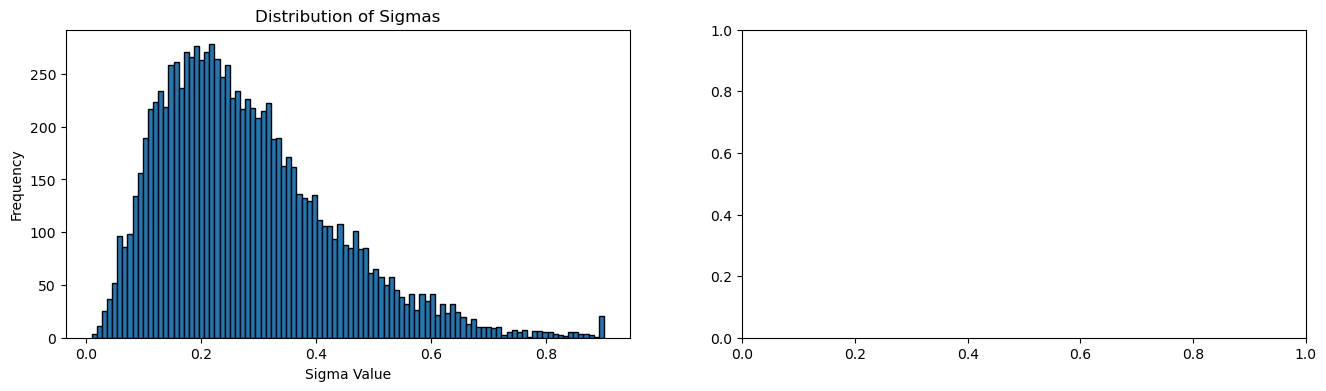

In [ ]:
def generate_sample_skewed(n_assets: int, target_mean: float = 0.20, 
                           sigma_min: float = 0.05, sigma_max: float = 0.70,
                           alpha_scale: float = 1.0, gamma_shape: float = 4.0):
    """Generates a random sample of weights and sigmas with skewed distributions,
    with a target mean for sigmas and control over weight concentration."""

    # Generate skewed weights (concentrated towards some assets)
    alpha = np.ones(n_assets) * 0.5 * alpha_scale  # Adjust alpha for desired skewness
    random_weights = np.random.dirichlet(alpha)

    # Generate skewed sigmas with a target mean
    # shape = np.random.random(1) * 5 + 2
    shape = gamma_shape
    scale = target_mean / shape
    sigmas = np.random.gamma(shape, scale, n_assets)
    sigmas = np.clip(sigmas, sigma_min, sigma_max)

    return random_weights, sigmas

n_assets = 1000
target_mean = 0.28
sigma_min = 0.01
sigma_max = 0.90

weights, sigmas = generate_sample_skewed(n_assets, target_mean, sigma_min, sigma_max,
                                         gamma_shape=3.5,alpha_scale=10000)

# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 4))  # 1 row, 2 columns

# Plot the distribution of sigmas
axes[0].hist(sigmas, bins=100, edgecolor='black')
axes[0].set_xlabel("Sigma Value")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Sigmas")

# Plot the distribution of weights
weights.sort()
axes[1].bar(range(len(weights)), weights)
axes[1].set_xlabel("Asset Index (Sorted)")
axes[1].set_ylabel("Weight")
axes[1].set_title("Distribution of Weights")
axes[1].set_xticks([])  # Remove x-axis ticks

plt.show()

In [10]:
sigma_index = 0.25

n_assets = 100
target_mean = 0.20
sigma_min = 0.05
sigma_max = 0.70

weights, sigmas = generate_sample_skewed(n_assets, target_mean, sigma_min, sigma_max)

implied_rho = implied_correlation_n_dim(sigma_index, sigmas, weights)

# print("Weights:", weights)
# print("Sigmas:", sigmas)
print("Implied Correlation:", implied_rho)

Implied Correlation: 0.7039716789317992


In [ ]:
n_assets = 100
target_mean = 0.20
sigma_min = 0.05
sigma_max = 0.70
sigma_index = 0.28

# alpha - modify the distribution of volatility
alpha_scales = [0.1, 0.25, 0.5, 0.75, 1.0, 5.0, 10.0, 25.0, 50.0, 100.0, 250.0, 500.0, 1000.0, 2500.0, 5000.0]
n_simulations = 10000

implied_correlations: dict[list] = {}  # Use a dictionary to store results

for alpha_scale in alpha_scales:
    implied_correlations[alpha_scale] = [] # Initialize list for each alpha_scale
    for _ in range(n_simulations):
        weights, sigmas = generate_sample_skewed(n_assets, target_mean, sigma_min, sigma_max, alpha_scale)
        implied_rho = implied_correlation_n_dim(sigma_index, sigmas, weights)
        implied_correlations[alpha_scale].append(implied_rho)

for alpha_scale, rho_values in implied_correlations.items():
    print(f"Alpha Scale: {alpha_scale} | Implied Correlation Mean: {np.mean(rho_values):.4f}, Std: {np.std(rho_values):.4f}")

Alpha Scale: 0.1 | Implied Correlation Mean: 1.2438, Std: 1.3038
Alpha Scale: 0.25 | Implied Correlation Mean: 0.9379, Std: 0.6194
Alpha Scale: 0.5 | Implied Correlation Mean: 0.8418, Std: 0.4599
Alpha Scale: 0.75 | Implied Correlation Mean: 0.7778, Std: 0.4014
Alpha Scale: 1.0 | Implied Correlation Mean: 0.7850, Std: 0.3401
Alpha Scale: 5.0 | Implied Correlation Mean: 0.7491, Std: 0.2423
Alpha Scale: 10.0 | Implied Correlation Mean: 0.7424, Std: 0.2192
Alpha Scale: 25.0 | Implied Correlation Mean: 0.7530, Std: 0.2202
Alpha Scale: 50.0 | Implied Correlation Mean: 0.7225, Std: 0.2062
Alpha Scale: 100.0 | Implied Correlation Mean: 0.7306, Std: 0.2053
Alpha Scale: 250.0 | Implied Correlation Mean: 0.7402, Std: 0.2019
Alpha Scale: 500.0 | Implied Correlation Mean: 0.7238, Std: 0.2123
Alpha Scale: 1000.0 | Implied Correlation Mean: 0.7356, Std: 0.1967
Alpha Scale: 2500.0 | Implied Correlation Mean: 0.7438, Std: 0.2076
Alpha Scale: 5000.0 | Implied Correlation Mean: 0.7347, Std: 0.2025


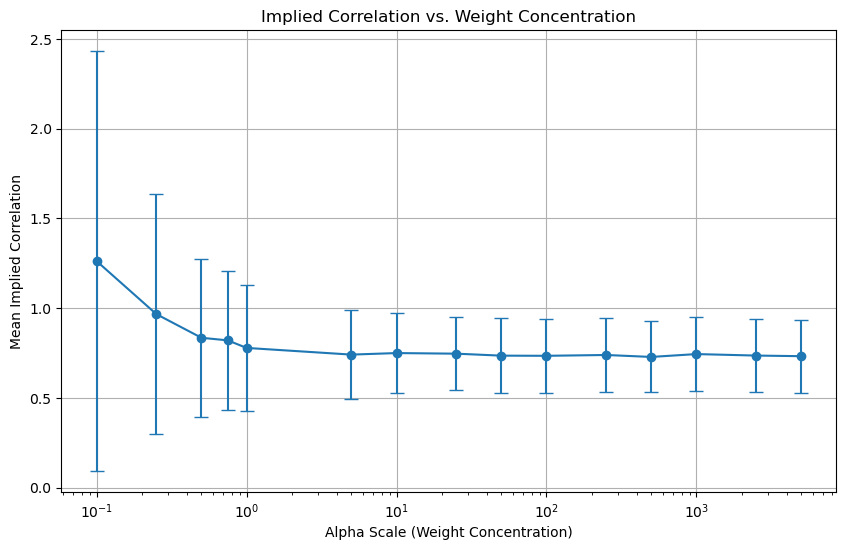

In [12]:
x_values = list(implied_correlations.keys())  # Alpha scales
y_values = [np.mean(rho_values) for rho_values in implied_correlations.values()]  # Mean implied correlations
y_err = [np.std(rho_values) for rho_values in implied_correlations.values()]  # Standard deviations

# Create the plot
plt.figure(figsize=(10, 6))
plt.errorbar(x_values, y_values, yerr=y_err, fmt='o-', capsize=5)
plt.xscale('log')  # Use logarithmic scale for x-axis
plt.xlabel("Alpha Scale (Weight Concentration)")
plt.ylabel("Mean Implied Correlation")
plt.title("Implied Correlation vs. Weight Concentration")
plt.grid(True)
plt.show()

In [103]:
import numpy as np
import matplotlib.pyplot as plt

n_assets = 100
target_mean = 0.20
sigma_min = 0.05
sigma_max = 0.70
sigma_index = 0.25

gamma_shapes = [3.00, 3.10, 3.20, 3.30, 3.40, 3.50, 3.75, 4.00, 5.0, 10.0, 100.0]
alpha_scales = [0.10, 0.15, 0.20, 0.25, 0.30, 0.40, 0.50, 0.75, 1.0, 10.0, 100.0, 1000.0]
n_simulations = 10000

implied_correlations = {}  # Use a nested dictionary to store results

for gamma_shape in gamma_shapes:
    implied_correlations[gamma_shape] = {}  # Initialize dictionary for each gamma_shape
    for alpha_scale in alpha_scales:
        implied_correlations[gamma_shape][alpha_scale] = []# Initialize list for each alpha_scale
        for _ in range(n_simulations):
            weights, sigmas = generate_sample_skewed(n_assets, target_mean, sigma_min, sigma_max, alpha_scale, gamma_shape)
            implied_rho = implied_correlation_n_dim(sigma_index, sigmas, weights)
            implied_correlations[gamma_shape][alpha_scale].append(implied_rho)

# Print the results (you can also plot them)
for gamma_shape, alpha_results in implied_correlations.items():
    print(f"Gamma Shape: {gamma_shape}")
    for alpha_scale, rho_values in alpha_results.items():
        print(f"  Alpha Scale: {alpha_scale} | Implied Correlation Mean: {np.mean(rho_values):.4f}, Std: {np.std(rho_values):.4f}")

Gamma Shape: 3.0
  Alpha Scale: 0.1 | Implied Correlation Mean: 0.6731, Std: 1.1755
  Alpha Scale: 0.15 | Implied Correlation Mean: 0.5261, Std: 0.8269
  Alpha Scale: 0.2 | Implied Correlation Mean: 0.4670, Std: 0.7104
  Alpha Scale: 0.25 | Implied Correlation Mean: 0.4210, Std: 0.6188
  Alpha Scale: 0.3 | Implied Correlation Mean: 0.3981, Std: 0.5516
  Alpha Scale: 0.4 | Implied Correlation Mean: 0.3671, Std: 0.4912
  Alpha Scale: 0.5 | Implied Correlation Mean: 0.3380, Std: 0.4330
  Alpha Scale: 0.75 | Implied Correlation Mean: 0.3180, Std: 0.3659
  Alpha Scale: 1.0 | Implied Correlation Mean: 0.3014, Std: 0.3316
  Alpha Scale: 10.0 | Implied Correlation Mean: 0.2612, Std: 0.2039
  Alpha Scale: 100.0 | Implied Correlation Mean: 0.2549, Std: 0.1918
  Alpha Scale: 1000.0 | Implied Correlation Mean: 0.2556, Std: 0.1896
Gamma Shape: 3.1
  Alpha Scale: 0.1 | Implied Correlation Mean: 0.6704, Std: 1.1277
  Alpha Scale: 0.15 | Implied Correlation Mean: 0.5369, Std: 0.8190
  Alpha Scale: 0.2

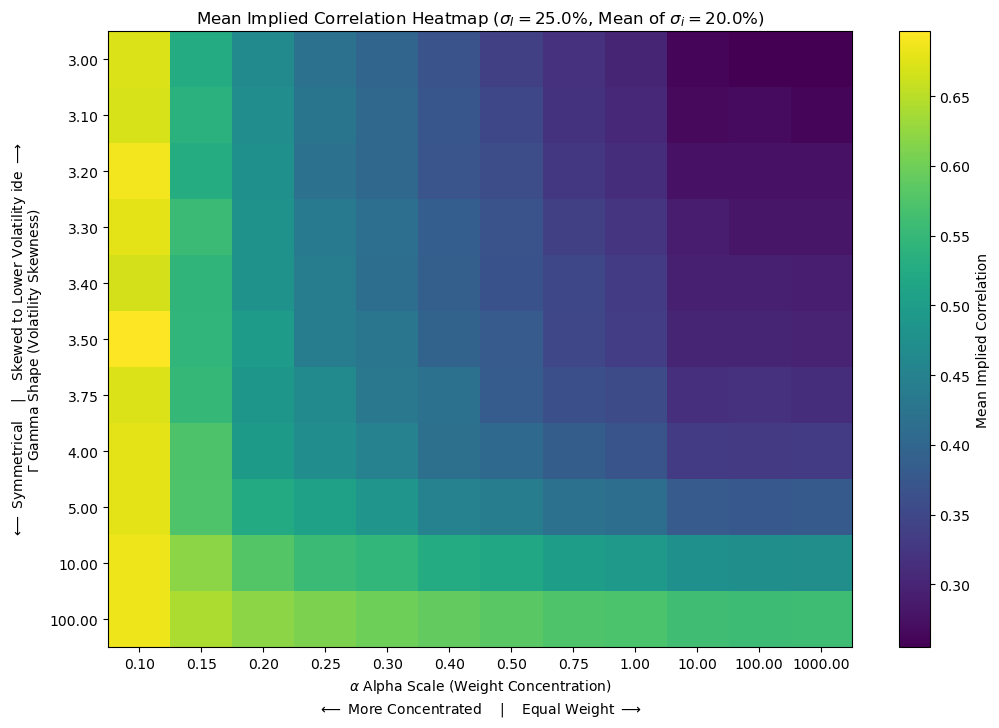

In [105]:
mean_implied_correlations = np.zeros((len(gamma_shapes), len(alpha_scales)))

for i, gamma_shape in enumerate(gamma_shapes):
    for j, alpha_scale in enumerate(alpha_scales):
        mean_implied_correlations[i, j] = np.mean(implied_correlations[gamma_shape][alpha_scale])

fig, ax = plt.subplots(figsize=(12, 8))  # Get the axis object
plt.imshow(mean_implied_correlations, cmap='viridis', interpolation='nearest', aspect='auto')
plt.colorbar(label="Mean Implied Correlation")

# Set x-axis ticks and labels
plt.xticks(range(len(alpha_scales)), [f"{alpha_scale:.2f}" for alpha_scale in alpha_scales])
plt.xlabel(r"$\alpha$ Alpha Scale (Weight Concentration)")

# Set y-axis ticks and labels
plt.yticks(range(len(gamma_shapes)), [f"{gamma_shape:.2f}" for gamma_shape in gamma_shapes])
plt.ylabel(r"$\Gamma$ Gamma Shape (Volatility Skewness)")

# Add additional text below x-axis ticks
ax.text(0.5, -0.1, r"$\longleftarrow$ More Concentrated    |    Equal Weight $\longrightarrow$", ha='center', va='center', transform=ax.transAxes)

# Add additional text below y-axis ticks
ax.text(-0.12, 0.5, r"$\longleftarrow$ Symmetrical    |    Skewed to Lower Volatility ide $\longrightarrow$", ha='center', va='center', rotation='vertical', transform=ax.transAxes)

plt.title(f"Mean Implied Correlation Heatmap ($\sigma_I=${sigma_index*100:.1f}%, Mean of $\sigma_i=${target_mean*100:.1f}%)")
plt.show()

In [106]:
from scipy.stats import gaussian_kde

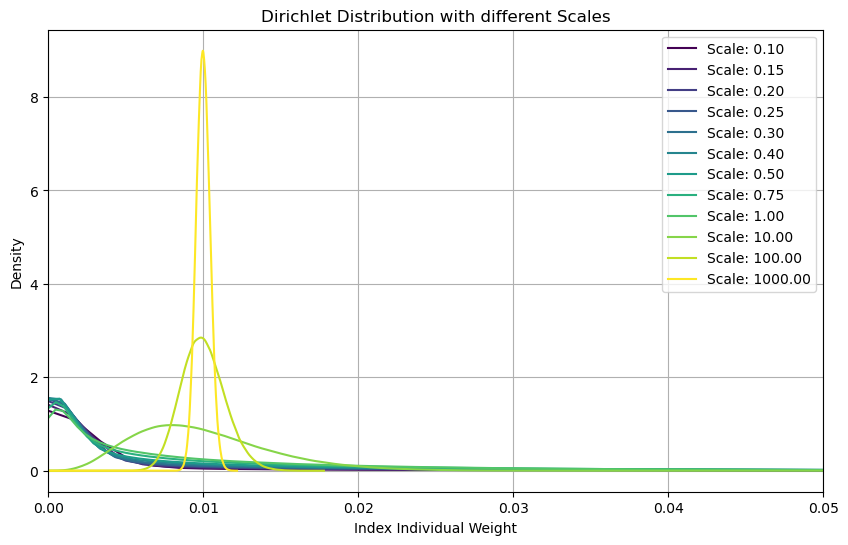

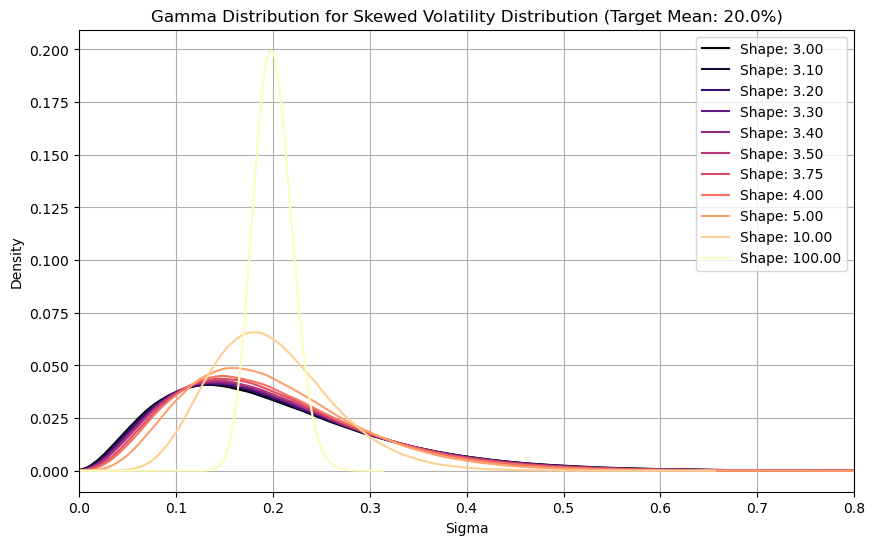

In [116]:
n_assets = 100
target_mean = 0.20
sigma_min = 0.05
sigma_max = 0.70
sigma_index = 0.28

n_simulations = 10000

# --- Plot for all alphas (Dirichlet distribution) ---
fig, ax = plt.subplots(figsize=(10, 6))

# Create colormap for alpha scales
alpha_cmap = plt.get_cmap('viridis', len(alpha_scales))

for i, alpha_scale in enumerate(alpha_scales):
    alpha = np.ones(n_assets) * 0.5 * alpha_scale
    weights = np.random.dirichlet(alpha, size=n_simulations)  # Generate multiple samples

    # Use KDE to estimate the PDF
    kde = gaussian_kde(weights.flatten())
    x_vals = np.linspace(0, max(weights.flatten()), 500)  # Generate x-values for the curve
    y_vals = kde(x_vals) / n_assets
    ax.plot(x_vals, y_vals, color=alpha_cmap(i), label=f"Scale: {alpha_scale:.2f}")

ax.set_xlabel("Index Individual Weight")
ax.set_ylabel("Density")
ax.set_title("Dirichlet Distribution with different Scales")
ax.set_xlim((0.00, 0.05))
ax.legend()
ax.grid(True)

# --- Plot for all gammas (Gamma distribution) ---
fig, ax = plt.subplots(figsize=(10, 6))

# Create colormap for gamma shapes
gamma_cmap = plt.get_cmap('magma', len(gamma_shapes))

for i, gamma_shape in enumerate(gamma_shapes):
    scale = target_mean / gamma_shape
    sigmas = np.random.gamma(gamma_shape, scale, size=n_simulations * n_assets)  # Generate multiple samples

    # Use KDE to estimate the PDF
    kde = gaussian_kde(sigmas)
    x_vals = np.linspace(0, max(sigmas), 500)  # Generate x-values for the curve
    y_vals = kde(x_vals) / n_assets
    ax.plot(x_vals, y_vals, color=gamma_cmap(i), label=f"Shape: {gamma_shape:.2f}")

ax.set_xlabel("Sigma")
ax.set_ylabel("Density")
ax.set_title(f"Gamma Distribution for Skewed Volatility Distribution (Target Mean: {target_mean*100:.1f}%)")
ax.set_xlim((0.0, 0.8))
ax.legend()
ax.grid(True)

plt.show()

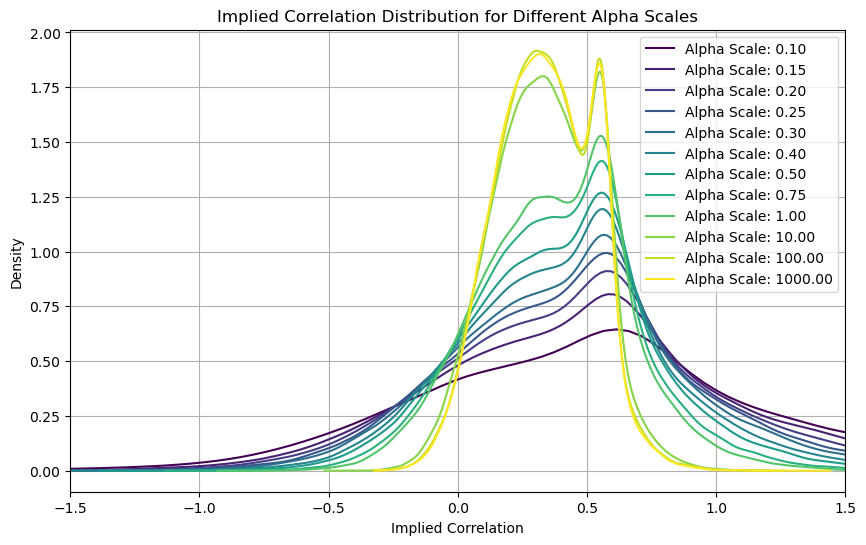

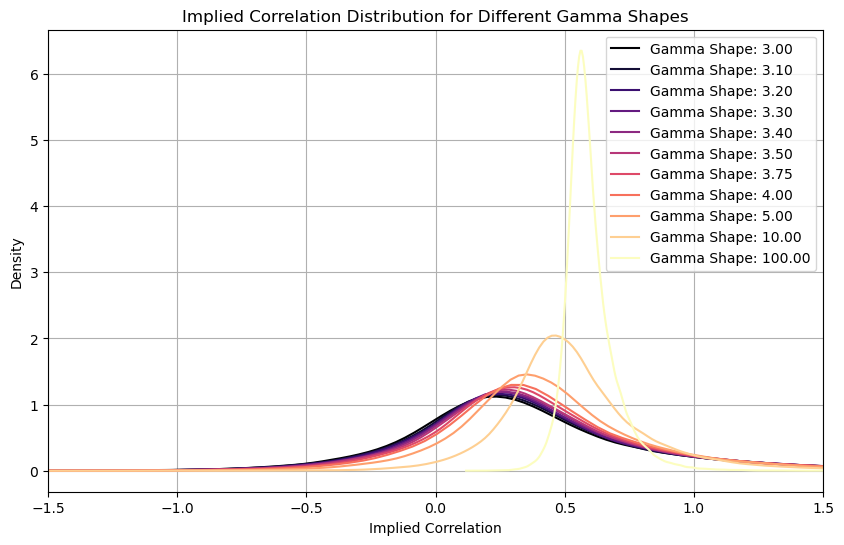

In [110]:
# --- Plot for all alphas ---
fig, ax = plt.subplots(figsize=(10, 6))

# Create colormap for alpha scales
alpha_cmap = plt.get_cmap('viridis', len(alpha_scales))

for i, alpha_scale in enumerate(alpha_scales):
    rho_values = []
    for gamma_shape in gamma_shapes:
        rho_values.extend(implied_correlations[gamma_shape][alpha_scale])  # Combine rho values for all gamma shapes

    kde = gaussian_kde(rho_values)
    x_vals = np.linspace(min(rho_values), max(rho_values), 500)
    y_vals = kde(x_vals)
    ax.plot(x_vals, y_vals, color=alpha_cmap(i), label=f"Alpha Scale: {alpha_scale:.2f}")

ax.set_xlabel("Implied Correlation")
ax.set_ylabel("Density")
ax.set_title("Implied Correlation Distribution for Different Alpha Scales")
ax.legend()
ax.set_xlim((-1.5, 1.5))
ax.grid(True)

# --- Plot for all gammas ---
fig, ax = plt.subplots(figsize=(10, 6))

# Create colormap for gamma shapes
gamma_cmap = plt.get_cmap('magma', len(gamma_shapes))

for i, gamma_shape in enumerate(gamma_shapes):
    rho_values = []
    for alpha_scale in alpha_scales:
        rho_values.extend(implied_correlations[gamma_shape][alpha_scale])  # Combine rho values for all alpha scales

    kde = gaussian_kde(rho_values)
    x_vals = np.linspace(min(rho_values), max(rho_values), 500)
    y_vals = kde(x_vals)
    ax.plot(x_vals, y_vals, color=gamma_cmap(i), label=f"Gamma Shape: {gamma_shape:.2f}")

ax.set_xlabel("Implied Correlation")
ax.set_ylabel("Density")
ax.set_title("Implied Correlation Distribution for Different Gamma Shapes")
ax.legend()
ax.set_xlim((-1.5, 1.5))
ax.grid(True)

plt.show()